# Linear Regression : Housing Price Prediction

In [151]:
#Importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn  as sns
from scipy.stats import pearsonr

In [152]:
df= pd.read_excel(r'C:\Users\HP\LetsUpgrade\Day-21-22\Housing price_LR.xlsx")
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [153]:
df.shape

(21613, 5)

In [154]:
df.info() #Cecking data feel #No null entries found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [155]:
df.isna().sum() #No null entries found 

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [156]:
df.describe() #to check any variable with zero standard deviation # None found, hence no need to drop any variable

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


## Exploring Data to check dispersion

#### To check three conditions of linear regression- Homoscedastic, Auto-correlation and no multi-collinearity between independent variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202B737CEB0>,
      dtype=object)

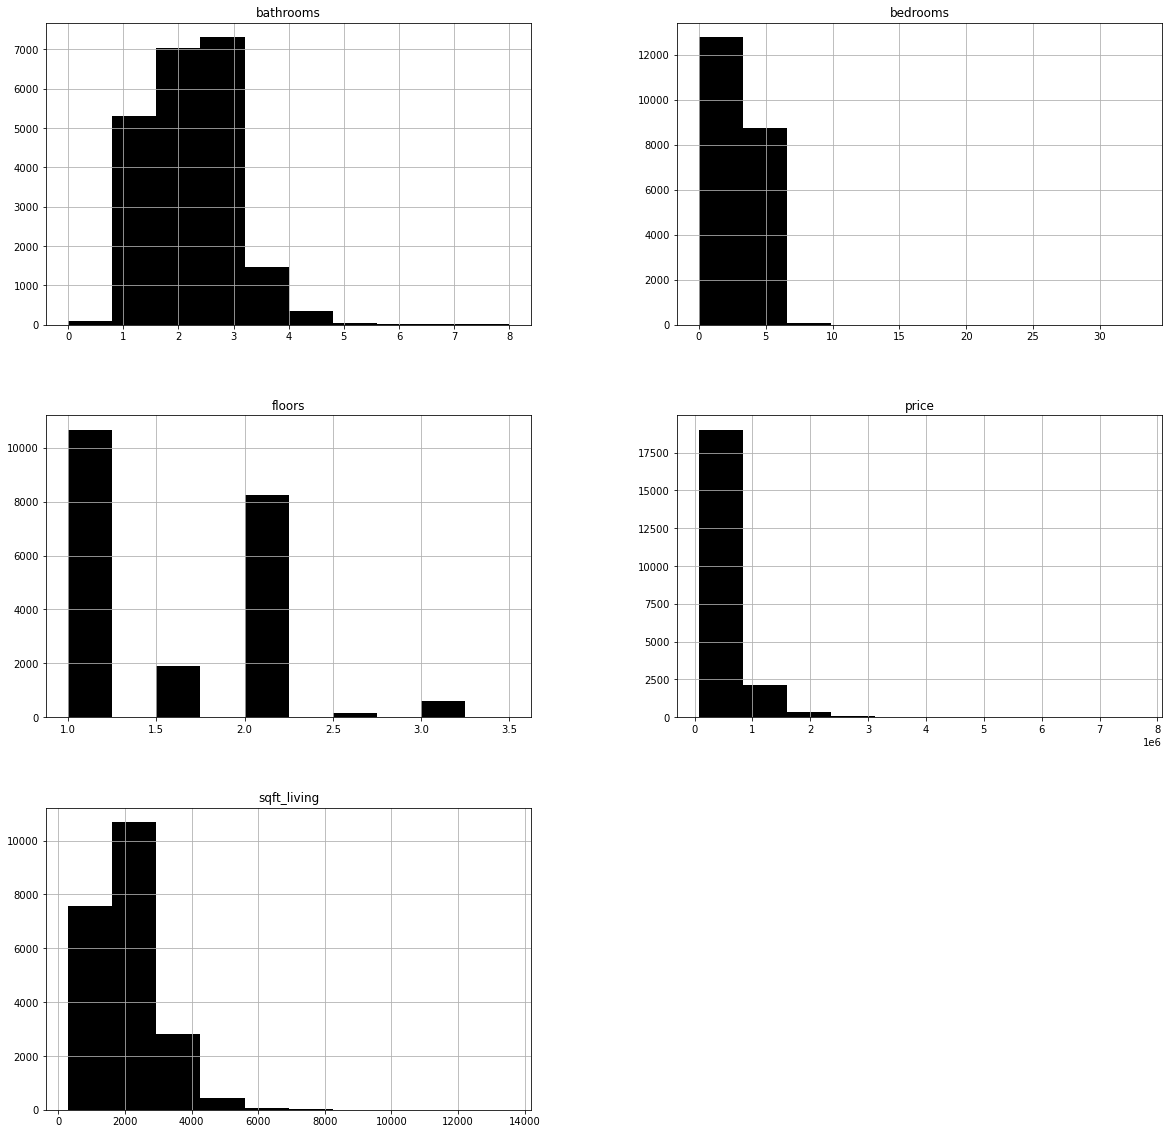

In [157]:
df.hist(figsize=(20,20), color='black')

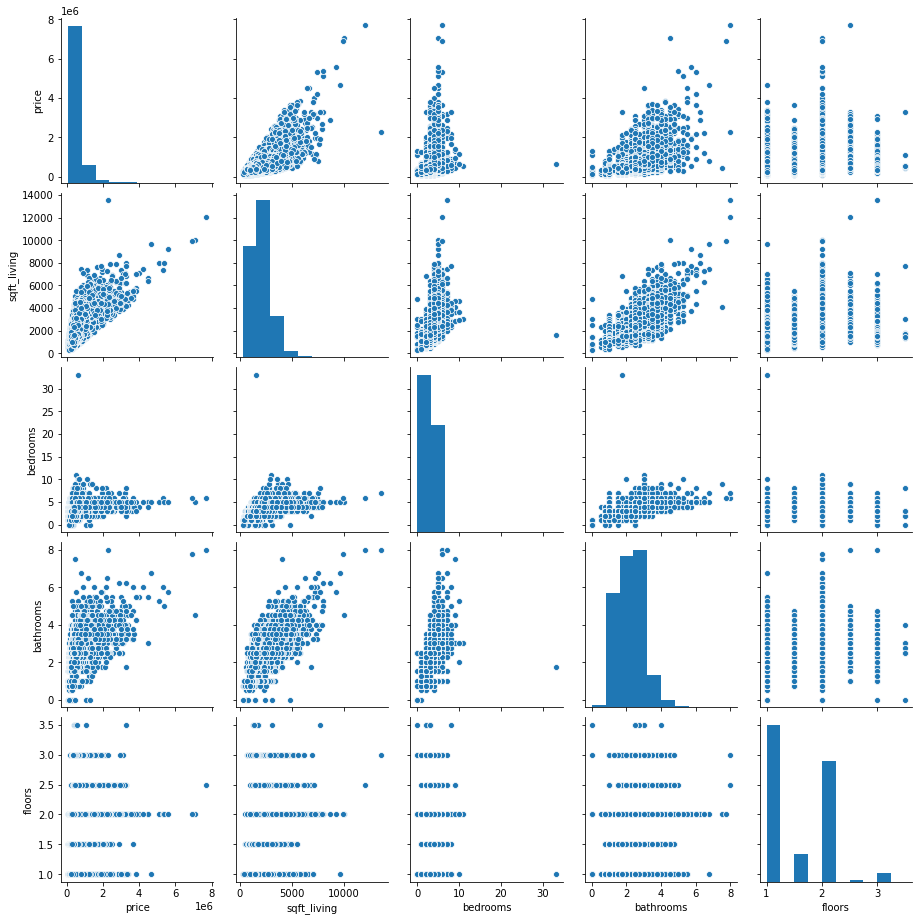

In [158]:
sns.pairplot(df)

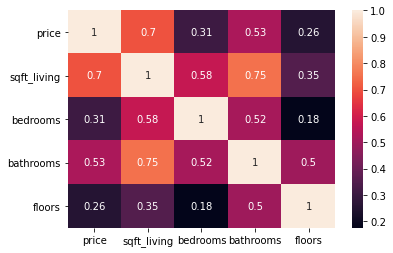

In [159]:
sns.heatmap(df.corr(), annot = True)

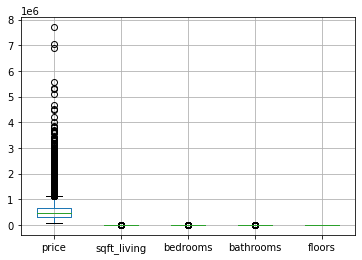

In [160]:
df.boxplot()

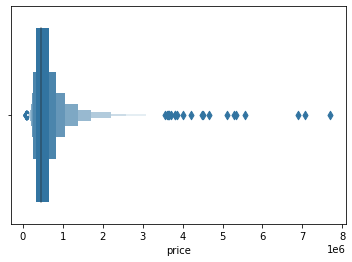

In [161]:
sns.boxenplot(df.price)

#### Observations and way forward :
#### 1. There is a strong correlation between Price (target) & Bedroom and Price (target) & sqft_living.
#### 2. We have to make linear models between the aforementioned pairs and further, try a multi-linear regression model.
#### 3. Data must be normalized
#### 4. There is a strong correlation between price and sqft_living, bathrooms and bedrooms. As, sqft_living is again strongly correlated with bathrooms, we can drop bathrooms from our multi-linear regression analysis. Further, there is again moderate collinearity between sqft_living and bedroom. But this might be ignored for the out project. 


## Normalizing

In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [163]:
df1=sc.fit_transform(df)
df1#After Normalization head() will not work

array([[-0.86671733, -0.97983502, -0.39873715, -1.44746357, -0.915427  ],
       [-0.00568792,  0.53363434, -0.39873715,  0.1756067 ,  0.93650577],
       [-0.98084935, -1.42625404, -1.47395936, -1.44746357, -0.915427  ],
       ...,
       [-0.37586519, -1.15404732, -1.47395936, -1.77207762,  0.93650577],
       [-0.38158814, -0.52252773, -0.39873715,  0.50022075,  0.93650577],
       [-0.58588173, -1.15404732, -1.47395936, -1.77207762,  0.93650577]])

## Model 1 | Simple Linear Regression 
## Price ~ Sqft_living

In [164]:
x = df.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [165]:
y = df.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


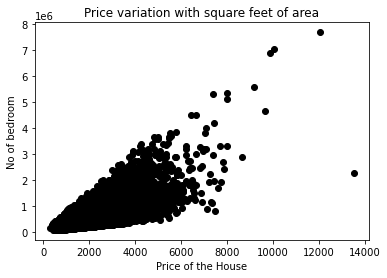

In [166]:
# Visualise dataset
plt.scatter(x,y, color='black')
plt.title('Price variation with square feet of area')
plt.xlabel('Price of the House')
plt.ylabel('No of bedroom')
plt.show()

In [167]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 3)

In [168]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize= True )

In [169]:
#Training Model
lin_reg.fit(x_train,y_train)
print('b1 :',lin_reg.coef_)
print('b0 :',lin_reg.intercept_)

b1 : [[280.51365758]]
b0 : [-44152.78861096]


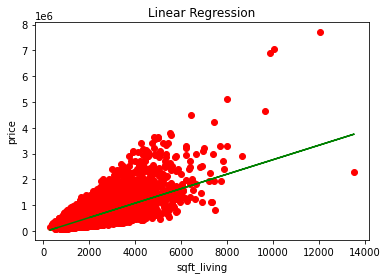

In [170]:
# Visualise Training set result
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train,lin_reg.predict(x_train), color = 'green')
plt.title('Linear Regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [171]:
#Test model
ypred = lin_reg.predict(x_test)
ypred

array([[ 404669.06351381],
       [1220963.80706574],
       [ 850685.7790628 ],
       ...,
       [ 295268.7370584 ],
       [ 553341.30203014],
       [ 208309.50320922]])

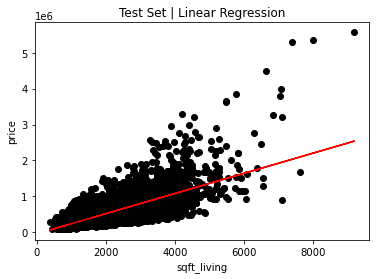

In [172]:
# Visualise Testing set result
plt.scatter(x_test, y_test, color = 'black')
plt.plot(x_test,lin_reg.predict(x_test), color = 'red')
plt.title('Test Set | Linear Regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [173]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE = np.sqrt(mean_squared_error(y_test,ypred))
print(f'RMSE :{RMSE}')

r_square = r2_score(y_test,ypred)
print(f'Rsquare : {r_square}')

RMSE :260226.32599290437
Rsquare : 0.49480151511572157


#### Conclusion: Sqft_living is 48% explaining the housing prices

## Model 2 | Simple Linear Regression 
## Price ~ Bedrooms

In [174]:
bedroom = df.iloc[:,2:3]
bedroom.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


Text(0, 0.5, 'No of bedroom')

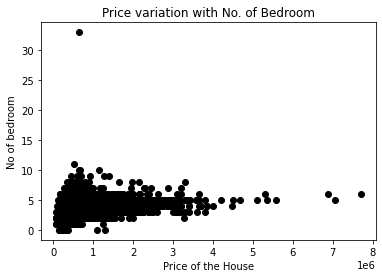

In [175]:
#visualize the pair
plt.scatter(y, bedroom, color='black')
plt.title('Price variation with No. of Bedroom')
plt.xlabel('Price of the House')
plt.ylabel('No of bedroom')

In [176]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(y,bedroom,test_size = 0.3,random_state = 3)

In [177]:
model2 = LinearRegression(normalize= True)
model2.fit(x_train2, y_train2)

LinearRegression(normalize=True)

In [178]:
#Training Model
lin_reg.fit(x_train2,y_train2)
print('b1 :',lin_reg.coef_)
print('b0 :',lin_reg.intercept_)

b1 : [[7.83305263e-07]]
b0 : [2.9512172]


Text(0, 0.5, 'Number of Bedrooms')

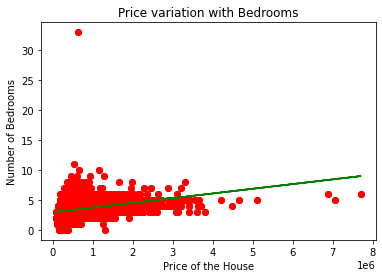

In [179]:
plt.scatter(x_train2, y_train2, color = 'red')
plt.plot(x_train2, model2.predict(x_train2), color = 'green')
plt.title('Price variation with Bedrooms')
plt.xlabel('Price of the House')
plt.ylabel('Number of Bedrooms')
plt.scatter(x_train2, y_train2, color = 'red')
plt.plot(x_train2, model2.predict(x_train2), color = 'green')
plt.title('Price variation with Bedrooms')
plt.xlabel('Price of the House')
plt.ylabel('Number of Bedrooms')

Text(0, 0.5, 'Number of bedrooms')

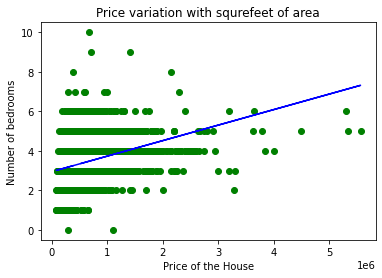

In [180]:
ypred2 = model2.predict(x_test2)

plt.scatter(x_test2,y_test2, color = 'green')
plt.plot(x_test2, model2.predict(x_test2), color = 'blue')
plt.title('Price variation with squrefeet of area')
plt.xlabel('Price of the House')
plt.ylabel("Number of bedrooms")

In [181]:
RMSE2 = np.sqrt(mean_squared_error(y_test2,ypred2))
print(f'RMSE :{RMSE2}')

r_square2 = r2_score(y_test2,ypred2)
print(f'Rsquare : {r_square2}')

RMSE :0.8577257263469096
Rsquare : 0.09876923049599795


#### Conclusion: No. of Bedrooms are 9.8% explaining the housing prices

## Model 3 | Multi-Linear Regression 
## Price ~ Sqft_living + Bedroom

In [182]:
independent= df.iloc[:,1:3]

In [183]:
independent.head()

,sqft_living,bedrooms
0,1180,3
1,2570,3
2,770,2
3,1960,4
4,1680,3


In [184]:

x_train3,x_test3,y_train3,y_test3 = train_test_split(independent,y,test_size = 0.3,random_state = 3)

In [185]:
model3 = LinearRegression(normalize=True)
model3

LinearRegression(normalize=True)

In [186]:

model3.fit(x_train3, y_train3)

LinearRegression(normalize=True)

In [187]:
ypred3 = model3.predict(x_test3)


In [188]:
RMSE3 = np.sqrt(mean_squared_error(y_test3,ypred3))
print(f'RMSE :{RMSE3}')

r_square3 = r2_score(y_test3,ypred3)
print(f'Rsquare : {r_square3}')

RMSE :255760.09177372884
Rsquare : 0.5119940274133832


#### Conclusion: No. of Bedrooms & sqft_living are 51% explaining the housing prices